# CS171 - Winter 2020 - Assignment 1
### Instructor: Vagelis Papalexakis
### TA: Yorgos Tsitsikas

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import *
from decimal import Decimal
from scipy.spatial import distance
from scipy.spatial import distance_matrix

#make sure you import here everything else you may need

ModuleNotFoundError: No module named 'pandas'

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [11]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]

### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

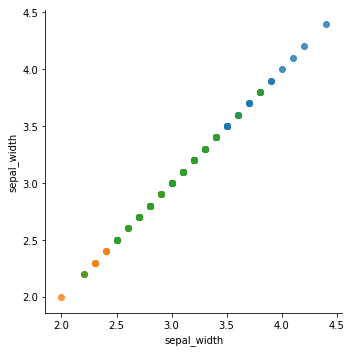

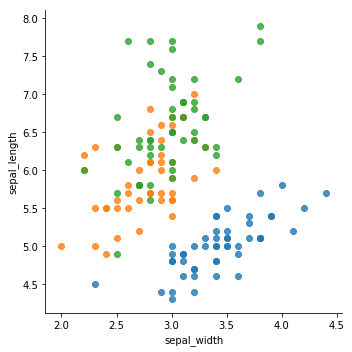

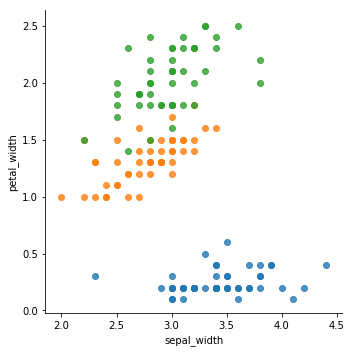

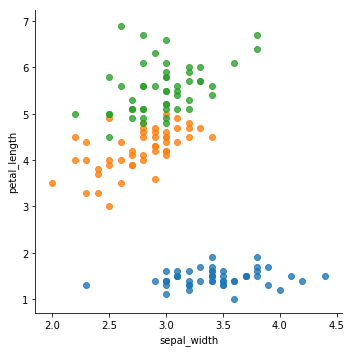

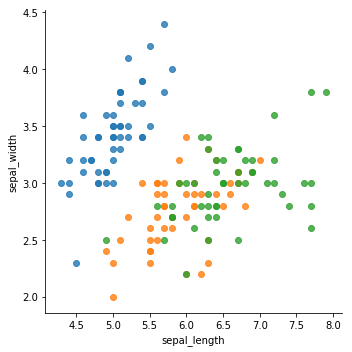

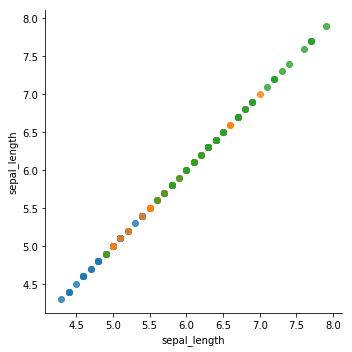

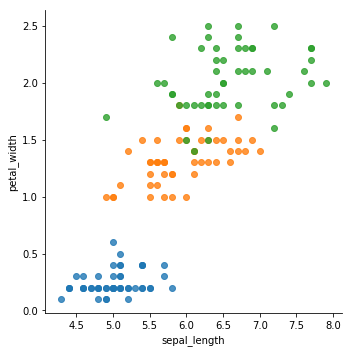

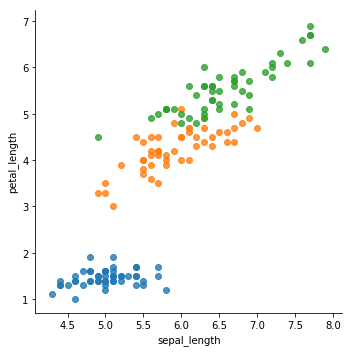

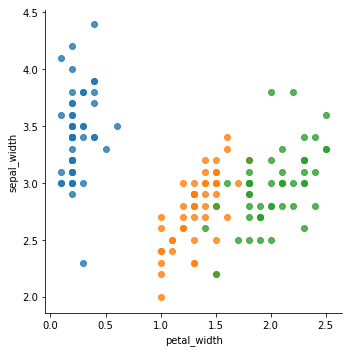

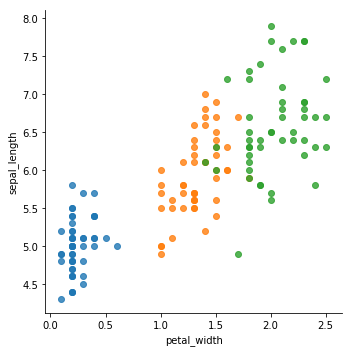

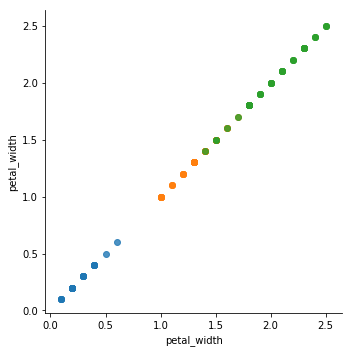

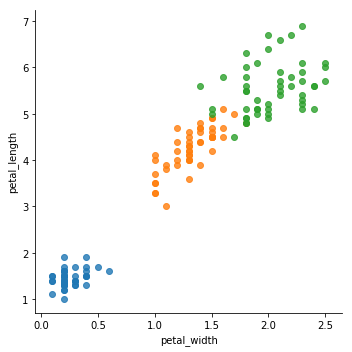

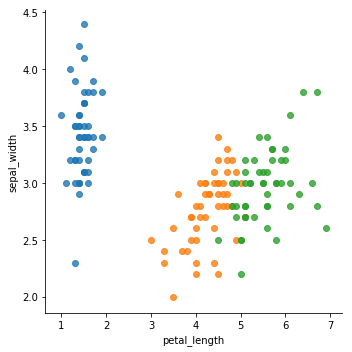

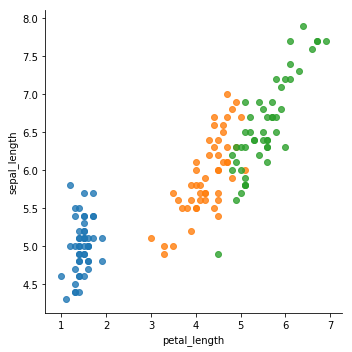

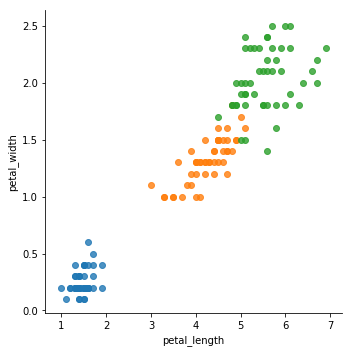

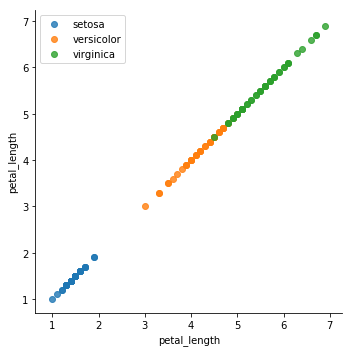

In [12]:
#your code here
iris = sns.load_dataset("iris")
iris["ID"] = iris.index

# Sepal Width 
sns.lmplot(x="sepal_width", y="sepal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="sepal_width", y="sepal_length", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="sepal_width", y="petal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="sepal_width", y="petal_length", data=iris, hue="species", fit_reg=False, legend=False)

# Sepal Length 
sns.lmplot(x="sepal_length", y="sepal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="sepal_length", y="sepal_length", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="sepal_length", y="petal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="sepal_length", y="petal_length", data=iris, hue="species", fit_reg=False, legend=False)

# Petal Width
sns.lmplot(x="petal_width", y="sepal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="petal_width", y="sepal_length", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="petal_width", y="petal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="petal_width", y="petal_length", data=iris, hue="species", fit_reg=False, legend=False)

# Petal Length 
sns.lmplot(x="petal_length", y="sepal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="petal_length", y="sepal_length", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue="species", fit_reg=False, legend=False)
sns.lmplot(x="petal_length", y="petal_length", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()


Your answer here:
2. Sepal Length/Sepal Length, Petal Length/Petal Width, Petal Width/Sepal Length
3. It is usefule when trying to classify flower by label becuase the more closely a flower fits a certain correlation the easier it is to classify it as either setosa, versicolor, or virginica. 


### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

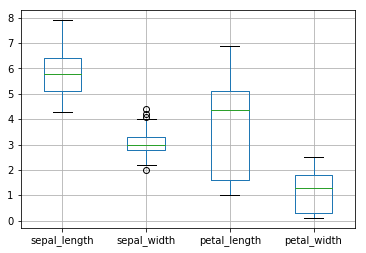

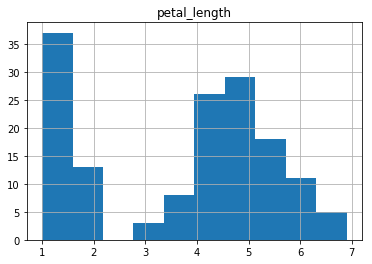

In [33]:
#your code here

# box plot 
df = pd.DataFrame(data,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
boxplot = df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# histogram
df = pd.DataFrame(data)
hist = df.hist(column='petal_length')


Your answer here:

3. Yes it gives more information about the distribution of data.  Here we can see the data is bimodal with a greater proportion of lengths in the 4-5 and 1-2.  This cannot be seen from the box plot because the box plot can show the sam values for min, Q1, median, Q3, and the max but have a completley different distribution.


## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [14]:
#your code here

def p_root(val, root):  
    root_val = 1 / float(root) 
    return round (Decimal(val) ** Decimal(root_val), 3) 
  
def lp_dist(x, y, p):  
    return (p_root(sum(pow(abs(a-b), p) 
            for a, b in zip(x, y)), p)) 
  
vector1 = [0, 2, 3, 4] 
vector2 = [2, 4, 3, 7] 
p = 2

print('Written Solution:')
print(lp_dist(vector1, vector2, p))

print('Numpy solution:')
print(distance.euclidean(vector1, vector2))

Written Solution:
4.123
Numpy solution:
4.123105625617661


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

In [3]:
#your code here

# Computation 
df = pd.DataFrame(data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

# Matrix 
plt.imshow(matrix);
plt.colorbar()
plt.show()

NameError: name 'pd' is not defined

Your answer here:
3. The minimum number of distance computations is (N x N) / 2. This is because when you divide the matrix in half diagonally the values on bottom left have the same values as the values as the top right.
4. From the matrix generated, we can observe that the top 1/3 is iris type 1 and so on and so forth. In addition, the lower left triangle the same as the upper right as mentioned in q3.  We can better see the density of the distances on the matrix as well.  We can see the top left and bottom right squares are colored mostly blue meaning that they have little to no distance between them.  The top right and bottom left squares are mostly yellow shoing that there is a greater distance between these points.

 

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [4]:
#your code here
def reservoir_sampling(stream,M):
    # Create reservoir 
    i = 0;
    res = [0] * M
    for i in range(M):
        res[i] = stream.iloc[i]
        
    # Reservoir is full (rej or keep data)
    while(i < len(stream)):
        j = random.randrange(i+1);         
        if(j < M): 
            res[j] = stream.iloc[i]; 
        i += 1; 
    return res

res = reservoir_sampling(data['petal_length'], 15)

# Histogram
fig, ax = plt.subplots()
ax.hist(res)
ax.set_title('Reservoir: petal length')

plt.show()


NameError: name 'data' is not defined

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

In [2]:
#your code here

# Get data by label
setosa_data = data[data['label'].isin(['Iris-setosa'])]
versicolor_data = data[data['label'].isin(['Iris-versicolor'])]
virginica_data = data[data['label'].isin(['Iris-virginica'])]

# For the petal length featur in pt 2
setosa = setosa_data['petal_length']
versicolor = versicolor_data['petal_length']
virginica = virginica_data['petal_length']

M = 5
res_set = (reservoir_sampling(setosa, M))
res_ver = (reservoir_sampling(versicolor, M))
res_vir = (reservoir_sampling(virginica, M))

sample = res_set + res_ver + res_vir

# Histogram
fig, ax = plt.subplots()
ax.hist(sample)
ax.set_title('Stratified: petal length')
plt.show()


NameError: name 'data' is not defined

Your answer here:
3. We can see that the stratified histogram distributes the data more accurately while the non-startified is not as accurate. 
